In [499]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[]

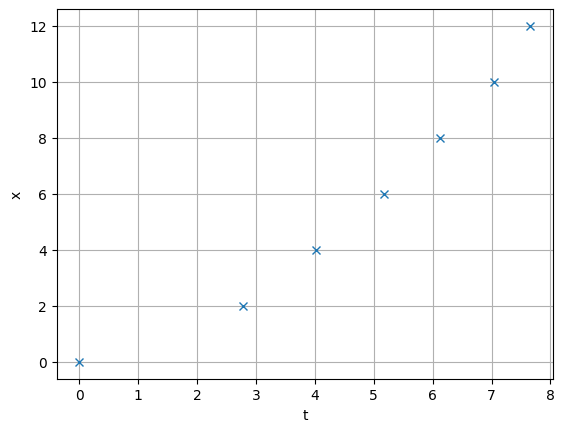

In [505]:
df = pd.read_csv("katseI.csv")
plt.ylabel("x")
plt.xlabel("t")
plt.plot(df["t"],df["x"], "x")

plt.grid()
plt.plot()

In [506]:
parabool, cov = np.polyfit(df["t"], df["x"], 2, cov = True)
määramatus = np.sqrt(np.diag(cov))

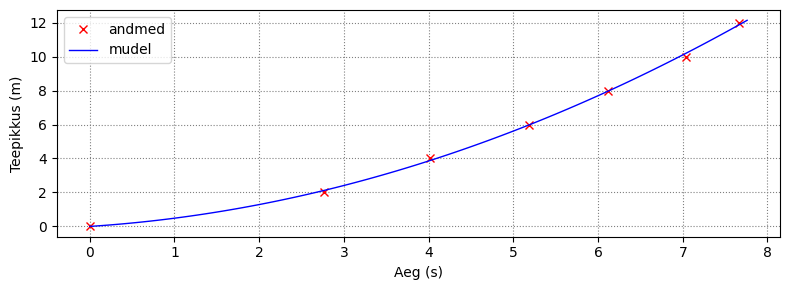

In [507]:
plt.figure( figsize=(8, 3) )
plt.plot(df["t"], df["x"], 'rx', label='andmed',lw='1')
t_1 = np.linspace(df["t"][0], df["t"][len(df["t"])-1] + 0.1, 100) # muutuja ruutfunktsiooni graafiku jaoks
x_1 = np.polyval(parabool, t_1)   # ruutfunktsiooni graafik
plt.plot(t_1, x_1, 'b-', label='mudel',lw='1')
plt.grid(color='gray', linestyle=':')
plt.xlabel('Aeg (s)')
plt.ylabel('Teepikkus (m)')
plt.legend()
plt.tight_layout()
plt.show()

In [95]:
m_a = 0.23623  #aeroauto mass
Δm_a = 0.00001 

print('Kiirendus : (%2.2f ± %5.2f) m/s^2' % (parabool[0]*2, määramatus[0]*1.96*2))
print('Jõud      : (%2.3f ± %5.3f) N' % (parabool[0]*2 * m_a, m_a* määramatus[0]*1.96*2))

Kiirendus : (0.32 ±  0.04) m/s^2
Jõud      : (0.076 ± 0.009) N


# II KATSE

In [ ]:
m_v = 0.26784  #plaadiga aeroauto mass II katses
Δm_v = 0.00001 

In [96]:
koguAndmestik = pd.read_csv("katseII.csv", delim_whitespace=True)
koguAndmestik

C:\Users\ander\AppData\Local\Temp\ipykernel_264\1358428498.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  koguAndmestik = pd.read_csv("katseII.csv", delim_whitespace=True)


,t,s,v,a,-
0,"0,00","0,340","1,045","-1,562",NaN
1,"0,05","0,396","0,964","-1,419",NaN
2,"0,10","0,440","0,882","-1,085",NaN
3,"0,15","0,481","0,860","-0,825",NaN
4,"0,20","0,527","0,816","-0,868",NaN
...,...,...,...,...,...
61,"3,05","0,441","-0,459","-0,238",NaN
62,"3,10","0,417","-0,472","-0,236",NaN
63,"3,15","0,393","-0,483","-0,223",NaN
64,"3,20","0,369","-0,495","-0,213",NaN


Kasutan kogu Vernier' andmestikku, sealhulgas kiiruse ja kiirenduse infot.
Komad on nõmedad.

In [227]:
t = np.array(koguAndmestik["t"])
t = np.array([float(x.replace(",", ".")) for x in t])

s = np.array(koguAndmestik["s"])
s = np.array([float(x.replace(",", ".")) for x in s])

v = np.array(koguAndmestik["v"])
v = np.array([float(x.replace(",", ".")) for x in v])

a = np.array(koguAndmestik["a"])
a = np.array([float(x.replace(",", ".")) for x in a])

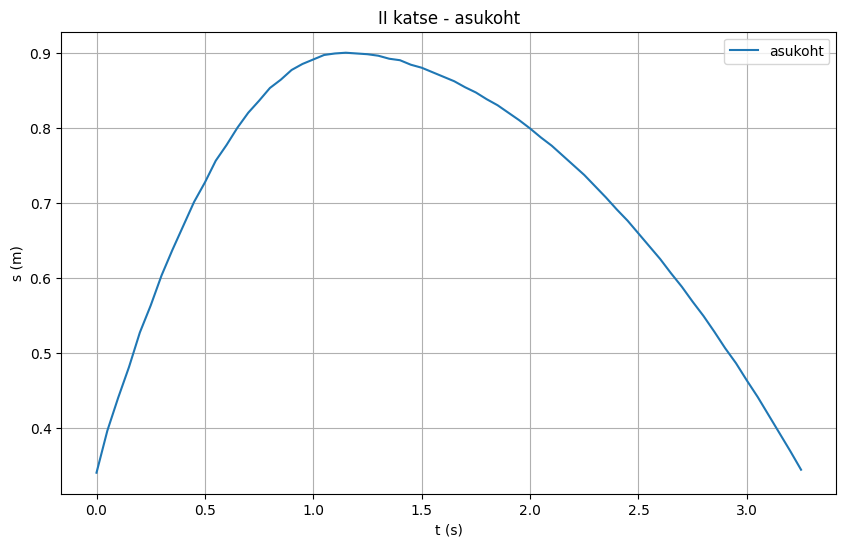

In [126]:
plt.figure(figsize=(10, 6))
plt.plot(t, s, label = "asukoht")
plt.legend()
plt.title("II katse - asukoht")
plt.ylabel("s (m)")
plt.xlabel("t (s)")
plt.grid()
plt.show()

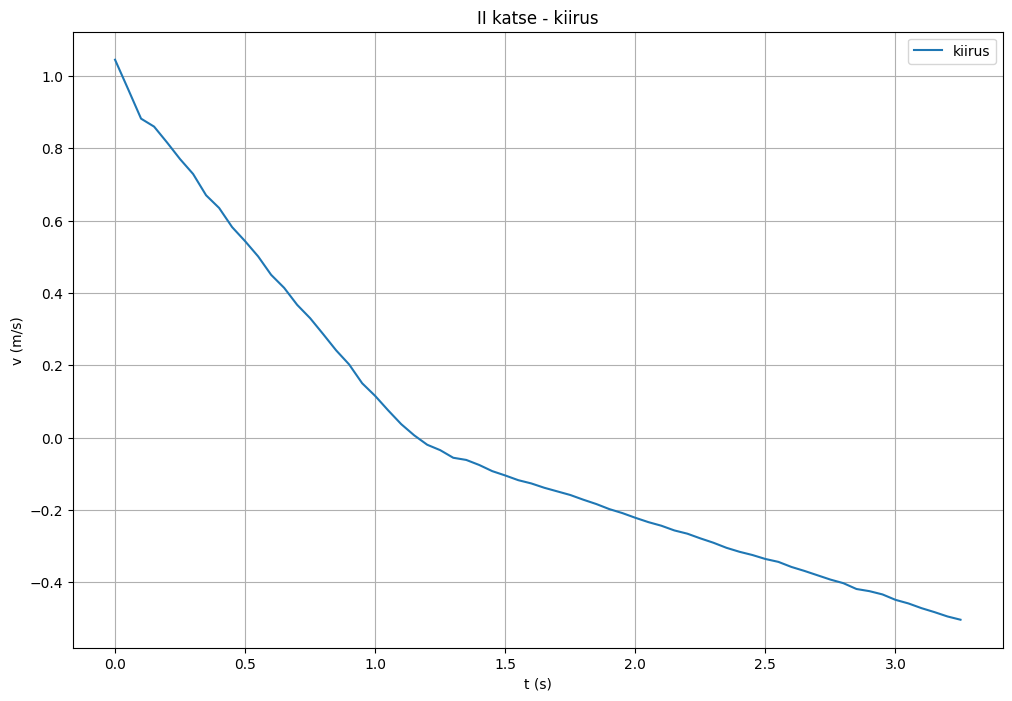

In [129]:
plt.figure(figsize=(12, 8))
plt.plot(t, v, label = "kiirus")
plt.legend()
plt.title("II katse - kiirus")
plt.ylabel("v (m/s)")
plt.xlabel("t (s)")
plt.grid()
plt.show()

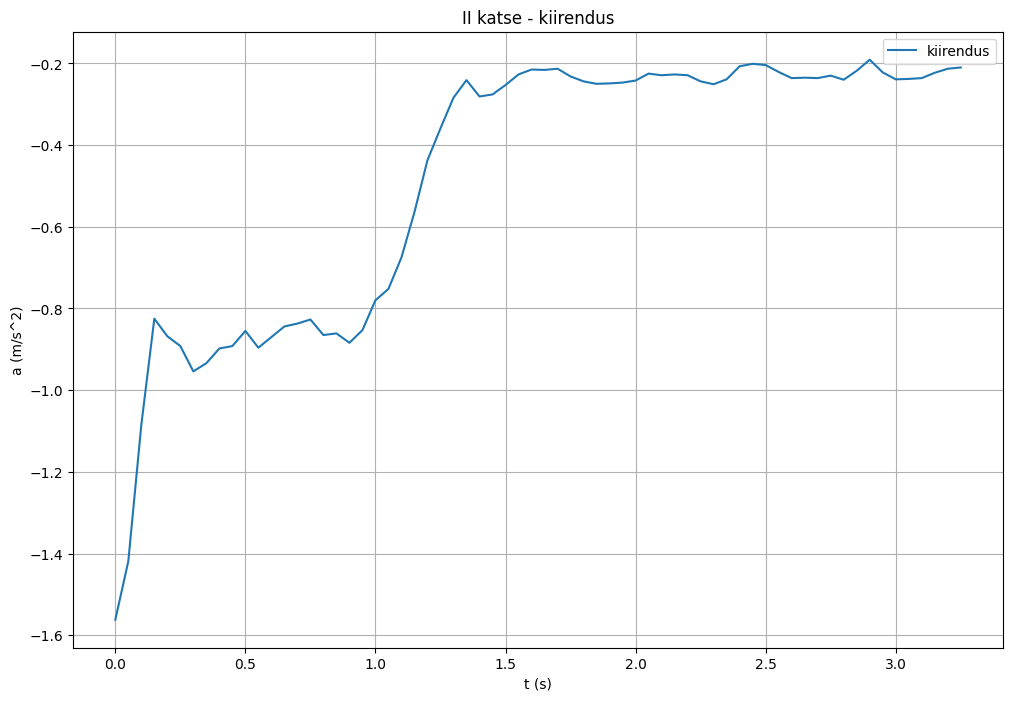

In [132]:
plt.figure(figsize=(12, 8))
plt.plot(t, a, label = "kiirendus")
plt.legend()
plt.title("II katse - kiirendus")
plt.ylabel("a (m/s^2)")
plt.xlabel("t (s)")
plt.grid()
plt.show()

## Minu uuendatud hüpotees II katse jaoks (olles näinud viimaseid kolme graafikut)

Kuna minu algne tõuge andis "harjumatult suure" kiiruse haprale ja õrnalt krigisevale lego sõidukile, kirjeldab süsteemi dünaamikat Newtoni II seaduse eeskirja järgi diferentsiaalvõrrand, millel on lisaks veojõule ka mittelineaarseid liikmeid, mis sõltuvad näiteks kiirusest ja kiiruse ruudust, mis tulenevad nii õhutakistusest kui ka hõõrdejõust rattatelgedel.

### Oodatav Newtoni II seaduse kuju antud süsteemile ja selle sobitamine andmetega


Olgu veojõud $F_0$ ja $F_T$ konstantse väärtusega takistav jõud, mis mõjub liikumisele vastassuunaliselt.
Mõjugu autole veel takistavad jõud, mis on kiirusega lineaarselt ja ruudus võrdelised.

$ m\ddot{x}(t) = F_0 + b \dot{x}(t) + c \dot{x}(t)|\dot{x}(t)| - F_T \cdot sign(\dot{x}(t))$ - ruutvõrdelisuse puhul jäägu kiiruse märk alles, et jõud suund paremini saaks kajastatud - takistav jõud mõjub liikumissuunale vastupidises suunas.

Sellisel juhul on meil II järku DV:

$ \ddot{x}(t) = \frac{F_0}{m} + \frac{b}{m} \dot{x}(t) + \frac{c}{m} \cdot sign(\dot{x}) \cdot (\dot{x}(t))^2 - F_T \cdot sign(\dot{x}(t))$

Ja süsteemina:

$ \dot{v}(t) = \frac{F_0}{m} + \frac{b}{m} v(t) + sign(\dot{x})\frac{c}{m}  v(t)^2 - F_T \cdot sign(\dot{x}(t))$

$ \dot{x}(t) = v $

Üritan sobitada seda pakutavat mudelit numbriliste meetoditega (Runge Kutta DV lahendaja ja Nelder-Mead).

In [436]:
vs_maatriks = np.vstack((v, s))
av_maatriks = np.vstack((a, v))

vs_maatriks[0]

array([ 1.045,  0.964,  0.882,  0.86 ,  0.816,  0.77 ,  0.729,  0.67 ,
        0.635,  0.582,  0.543,  0.501,  0.45 ,  0.414,  0.367,  0.33 ,
        0.286,  0.241,  0.202,  0.15 ,  0.115,  0.075,  0.037,  0.006,
       -0.02 , -0.035, -0.056, -0.062, -0.076, -0.093, -0.105, -0.118,
       -0.127, -0.139, -0.149, -0.159, -0.172, -0.184, -0.198, -0.209,
       -0.222, -0.234, -0.244, -0.257, -0.266, -0.279, -0.291, -0.305,
       -0.316, -0.325, -0.336, -0.344, -0.358, -0.369, -0.381, -0.393,
       -0.403, -0.419, -0.425, -0.434, -0.449, -0.459, -0.472, -0.483,
       -0.495, -0.504])

In [564]:
vs_maatriks = vs_maatriks.T
av_maatriks = av_maatriks.T

vs_maatriks.shape #--> (2, 66)

(2, 66)

In [446]:
vs_maatriks[:,0]

array([1.045, 0.34 ])

In [561]:
from scipy.integrate import solve_ivp

def pakutavDV(t, sisend, a, b, c, d):
    xdot, x = sisend[:2]

    xddot = a + b*xdot + c *np.abs(xdot) * xdot + d * np.sign(xdot)

    return [xddot, xdot]

#solve_ivp lahendab vaikimisi Runge-Kutta 4-5-ga
def sobita_DV(t, parameetrid, andmed):
    vs0 = andmed[:,0]  #mõõdetud kiiruse ja asukoha algtingimus
    
    #genereerib numbrilise lahendi sisestatud pakutud parameetritega
    #solve_ivp lahendab vaikimisi Runge-Kutta 4-5-ga
    solution = solve_ivp(
        fun=pakutavDV,
        t_span=[t[0], t[-1]],
        y0=vs0,
        t_eval=t, 
        args=tuple(parameetrid),
    )
    return solution.y # tagastab nii kiiruse ja asukoha andmevektori 

# kaofunktsiooni/veahinnang
def kaofunktsioon(parameetrid, t, andmed):
    
    mudeli_ennustus = sobita_DV(t, parameetrid, andmed)
    v_pred, s_pred = mudeli_ennustus
    v_data, s_data = andmed

    kiiruse_viga = np.sum((v_pred - v_data) ** 2)
    asukoha_viga = np.sum((s_pred - s_data) ** 2)

    return asukoha_viga + kiiruse_viga


from scipy.optimize import minimize

algne_pakkumine = [-0.4, -0.2, -0.03, -0.1]

result = minimize(kaofunktsioon, algne_pakkumine, args=(t, vs_maatriks), method='Nelder-Mead')

parameetrid_opt = result.x
print("Optimized Parameters:", parameetrid_opt)


Optimized Parameters: [-0.53977661 -0.25336336 -0.03296091 -0.24056621]


In [562]:
result.fun

0.010164373591137732

Üldjuhul on takistav funktsioon võrdeline kiiruse absoluutväärtusega ning vastassuunaline!

Pakutud sobitatud parameetrid DV jaoks kujul:

$ \ddot{x}(t) = F( \dot{x}, \theta ) = \frac{F_0}{m} + \frac{b}{m} \dot{x}(t) + \frac{c}{m} (\dot{x}(t))^2 $

Leitud Parameetrid $\theta$:

$[a, b, c] = [\frac{F_0}{m}, \frac{b}{m} , \frac{c}{m}] = [-0.44505811 -0.7577781  -0.1180188]$

DV lahendi ruutkeskmine viga sobitatud parameetritega:

$\min_{\theta} L(x_{mõõdetud}, \theta) \min_{\theta} | = \min_{\theta} |\textbf{x}_{mõõdetud} - \textit{F}_{numbriline}(\textbf{x}_0, \theta)|^2 = 0.05985853351204216$


[]

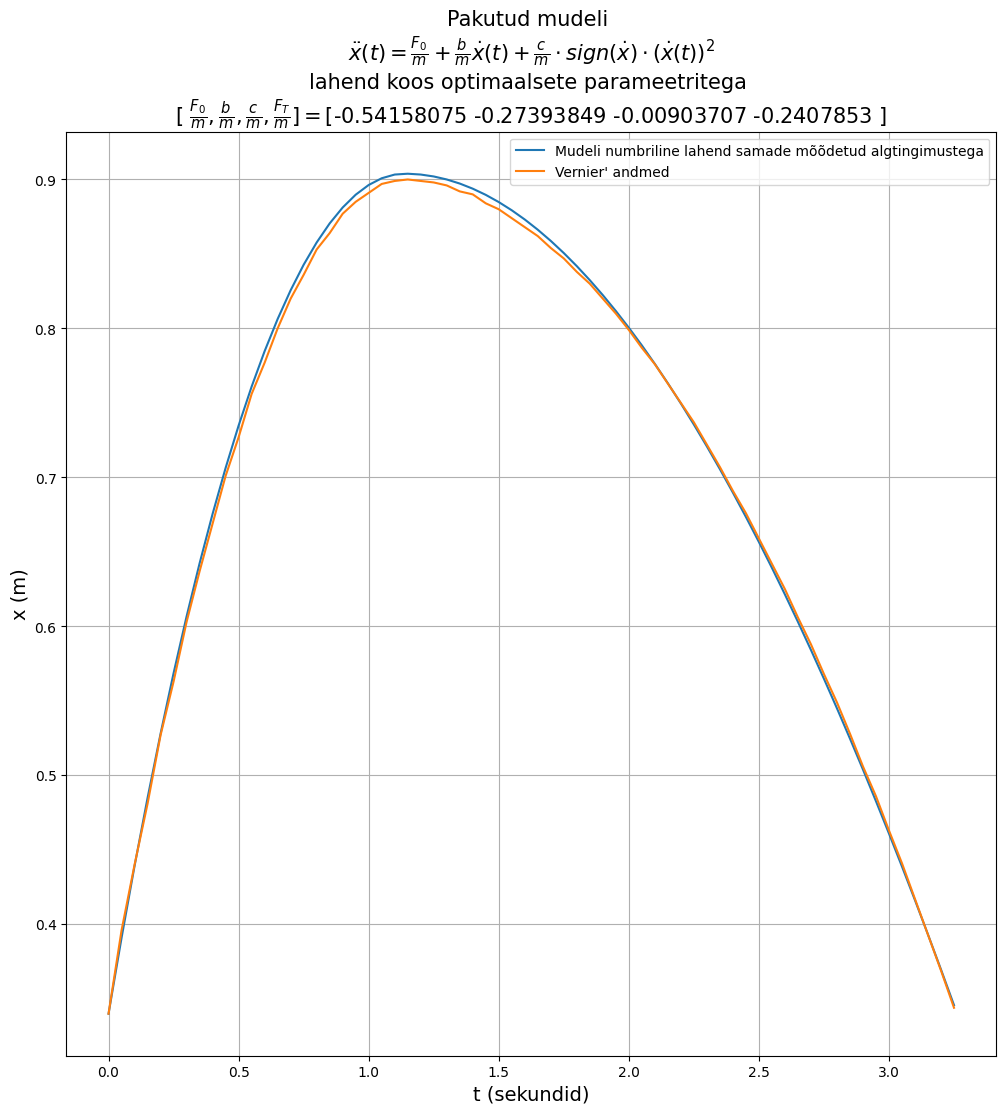

In [548]:
# sobitatud parameetritega lahendi kõver

uuslahend = solve_ivp(pakutavDV, y0=vs_maatriks[:,0], t_span=[t[0], t[-1]],
        t_eval=t,  args = tuple(parameetrid_opt))


plt.figure(figsize = (12, 12))

pealkiri = str("Pakutud mudeli \n" +  r"$ \ddot{x}(t) = \frac{F_0}{m} + \frac{b}{m} \dot{x}(t) + \frac{c}{m} \cdot sign(\dot{x}) \cdot (\dot{x}(t))^2$" + 
          "\nlahend koos optimaalsete parameetritega \n" + 
          r"[ $\frac{F_0}{m}, \frac{b}{m} , \frac{c}{m}, \frac{F_T}{m}] =$" + f"{parameetrid_opt}")

plt.title(pealkiri, fontsize = 15)
plt.plot(t, uuslahend.y[1], label = "Mudeli numbriline lahend samade mõõdetud algtingimustega")
plt.plot(t, s, label = "Vernier' andmed")

plt.ylabel("x (m)", fontsize = 14)
plt.xlabel("t (sekundid)",  fontsize = 14)
plt.legend()
plt.grid()
plt.plot()


[]

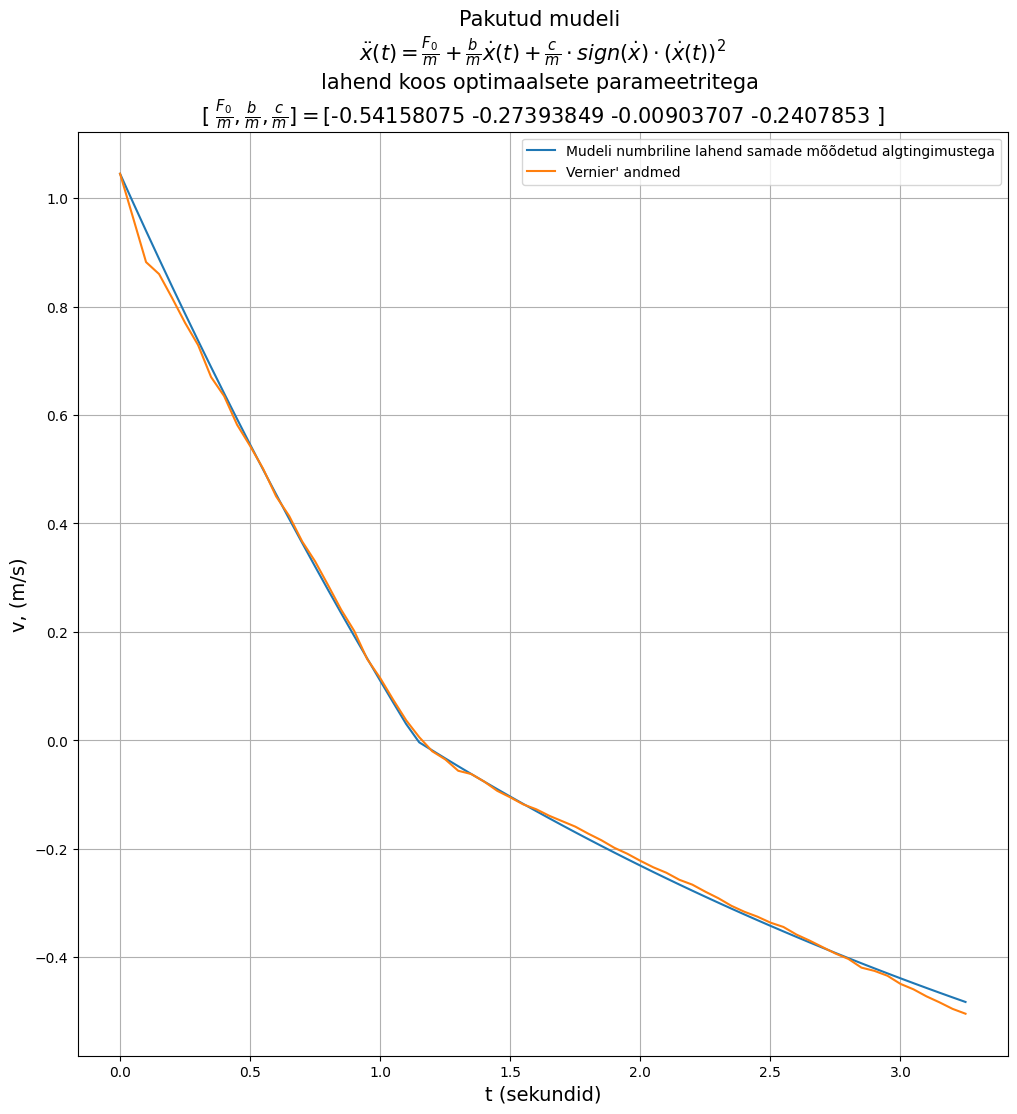

In [554]:
# sobitatud parameetritega lahendi kõver - v


plt.figure(figsize = (12, 12))

plt.title("Pakutud mudeli \n" +  r"$ \ddot{x}(t) = \frac{F_0}{m} + \frac{b}{m} \dot{x}(t) + \frac{c}{m} \cdot sign(\dot{x}) \cdot (\dot{x}(t))^2$" + 
          "\nlahend koos optimaalsete parameetritega \n" + 
          r"[ $\frac{F_0}{m}, \frac{b}{m} , \frac{c}{m}] =$" + f"{parameetrid_opt}", fontsize = 15)
plt.plot(t, uuslahend.y[0], label = "Mudeli numbriline lahend samade mõõdetud algtingimustega")
plt.plot(t, v, label = "Vernier' andmed")


plt.ylabel("v, (m/s)", fontsize = 14)
plt.xlabel("t (sekundid)",  fontsize = 14)
plt.legend()
plt.grid()
plt.plot()


[]

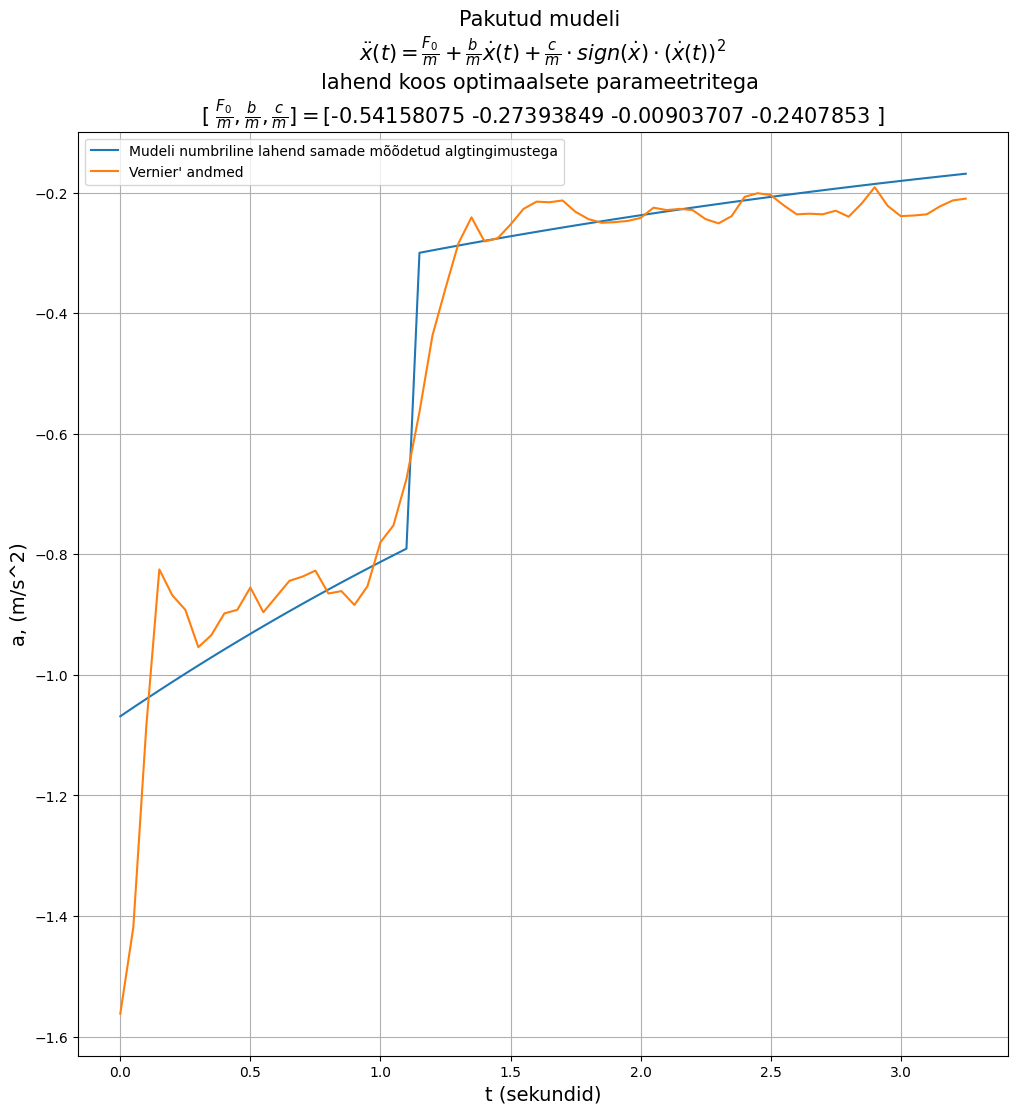

In [551]:
# sobitatud parameetritega lahendi kõver - a

#arvutatavad kiirendused genereerid genereeritud datast:
uusLahendKiirendused = [pakutavDV(t, el, *parameetrid_opt)[0] for el in uuslahend.y.T]

plt.figure(figsize = (12, 12))

plt.title("Pakutud mudeli \n" +  r"$ \ddot{x}(t) = \frac{F_0}{m} + \frac{b}{m} \dot{x}(t) + \frac{c}{m} \cdot sign(\dot{x}) \cdot (\dot{x}(t))^2$" + 
          "\nlahend koos optimaalsete parameetritega \n" + 
          r"[ $\frac{F_0}{m}, \frac{b}{m} , \frac{c}{m}] =$" + f"{parameetrid_opt}", fontsize = 15)
plt.plot(t, uusLahendKiirendused, label = "Mudeli numbriline lahend samade mõõdetud algtingimustega")
plt.plot(t, a, label = "Vernier' andmed")


plt.ylabel("a, (m/s^2)", fontsize = 14)
plt.xlabel("t (sekundid)",  fontsize = 14)
plt.legend()
plt.grid()
plt.plot()


### Tõlgendused ühel optimisatsioonil fikseeritud parameetritele:

Mass oli 0.26784 kg*

1. $F_0/m = -0.55 \frac{m}{s^2}$ 
- konstantne kiirenduse liige
- ootuspäraselt negatiivne (vastassuunaline mõõtja suhtes)
- $F_0$ on veojõud
- $F_0 = -0.55 N/kg \cdot0.26784 kg = -0.148 N$
- Erinevate algpakkumiste puhul koondus $F_0 /$ m alati -0.45 N/kg ümber ehk see võikski olla mõistlik hinnang.

2. $ b/m = - 0.7577781 s^{-1}$ - b on mingil moel laminaarse õhuvoo teguri ja rataste höördetegurite summa?
3. $ c/m = - ~0.1 s^{-2}$ - c on täienisti turbulentse takistusjõu tegur?
4. $F_T/m = - 0.245 N/m $ - konstantse väärtusega takistav jõud.

### VEA HINNANG
Diferentsiaalvõrrandi numbrilist lahendit andmestikuga sobitava optimisatsiooni algoritmi optimaalseima parameetrina saadud füüsikalise suuruse viga on väga raske hinnata. Viga võis lisaks mõõtmistele juurde tulla nii ebapiisava optimisatsiooni protsessi kui ka lõpliku täpsusega DV numbrilise integreerimise käigus.

### UUS HÜPOTEES
PLAADI PINDALA SUURENDAMISEL SUURENEVAD TEGURID B JA C VÕRDELISELT! (või kui ei suurene võrdeliselt, siis saab täpsemalt hinnata, kui suur osa takistusjõust on õhutakistus ja kui palju panustab höördejõud)

OPTIMEERITAVATE PARAMEETRITE ERINEVATE ALGPAKKUMISTE PUHUL TULID ERINEVAD LÕPLIKUD PARAMEETRIT KOOS ERINEVATE RUUTKESKMISTE VIGADEGA, MIS KOONDUSID CA 0.05 ÜMBER.

Veokiirendus oli igal erineva tulemusega optimisatsioonil samas vahemikus 0.43 - 0.49 N/kg vahel.
### LOO MORAAL
TUNDUB OLEVAT KESKELTLÄBI HEA MUDEL, KUID ILMSELT ON TEGU PSEUDOTEADUSEGA, SEST ÜHESELT KOONDUVATE PARAMEETRITEGA HEAD MUDELIT EI TEKI

_“With four parameters I can fit an elephant, and with five I can make him wiggle his trunk.” - John von Neumann_

## KOGU EDASPIDINE: TODO (ILMSELT OVERKILL)

## Dünaamilise süsteemi tuvastusvahend SINDy - Sparse Identification of Non-linear Dynamics
Tegu on dünaamilisi süsteeme tuvastava maatriksmeetodiga, mis kasutab, et sobitada teatud andmetöötlusvõtetega (_sparse, nonlinear regression_) kandidaatfunktsioonid mõõdetud dünaamilise süsteemi andmemaatriksi tuletistega, et leida süsteemi kirjeldava diferentsiaalvõrrandi kuju ja parameetrid.

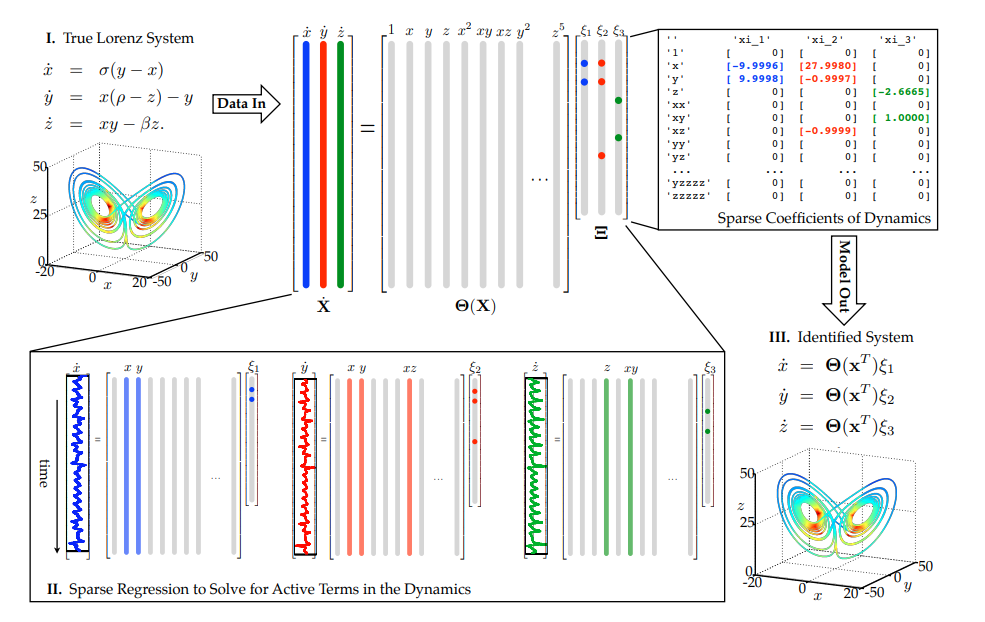

(Brunton et. al, 2015)

### Newtoni II seaduse võrrandi esitamine diferentsiaalvõrrandite süsteemina
Vajalik, kuna SINDy on mõeldud lahendama esimest järku tuletistega DVS-sid.

$\ddot{s}(t) = F(s, t) = ?$\
$\dot{s}(t) = v(t)$\
$\ddot{s}(t) = \dot{v}(t) = a(t)$

Seega meil on DVS kujul:

$\dot{s}(t) = v(t)$\
$\dot{v}(t) = F(s, t) = ?$


In [234]:
import pysindy as ps
optimizer = ps.STLSQ(threshold=0.0001)

feature_names = ["v", "s"]
model = ps.SINDy(optimizer=optimizer, feature_names = feature_names)
model.fit(vs_maatriks, t=t, x_dot=av_maatriks)

predicted_derivatives = model.predict(vs_maatriks)
mse = np.mean((predicted_derivatives - av_maatriks) ** 2)

model.print()
print("mse: ", mse)

(v)' = -4.468 1 + -3.276 v + 6.250 s + 3.724 v^2 + 2.051 v s + -2.048 s^2
(s)' = 1.000 v
mse:  0.005586863049342901


(x0)' = -4.468 1 + -3.276 x0 + 6.250 x1 + 3.724 x0^2 + 2.051 x0 x1 + -2.048 x1^2

(x1)' = 1.000 x0

mse:  0.005586863049342901

a(t) = -4.468 - 3.265v(t) + 6.250s(t) + 3.724(v(t))^2 + 2.051 v(t)*s(t) - 2.048(s(t))^2

Liikmed s(t) kiirenduse võrrandis on nonsenss (oleksid loogilised, kui vedrud oleksid mängus).

Defineerin kindlad lubatavad kandidaatfunktsoonid:

In [257]:
# Define library functions that apply only to the first feature (v)
library_functions = [
    lambda x: 1,
    lambda x: x,
    lambda x: x[0],         # Apply linear function to v (x[0])
    lambda x: x[0]**2,      # Apply quadratic function to v (x[0]**2)
]

# Define the names for these functions
library_function_names = [
    lambda x: 1,
    lambda x: x,
    lambda x: "v",          # Name for linear term (v)
    lambda x: "v^2",        # Name for quadratic term (v^2)
]

custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)

optimizer = ps.STLSQ(threshold=0.001)

feature_names = ["v", "s"]
model = ps.SINDy(optimizer=optimizer, feature_names = feature_names, feature_library=custom_library)
model.fit(vs_maatriks, t=t, x_dot=av_maatriks)

predicted_derivatives = model.predict(vs_maatriks)
mse = np.mean((predicted_derivatives - av_maatriks) ** 2)

model.print()
print("mse: ", mse)

(v)' = 930177519566.182 1 + -28349226330459.293 1 + -0.727 v + 0.104 s + -12876395900338.172 v + -12848715016468.078 v + 41512110623047.492 v^2 + -768312896092.552 v^2
(s)' = 1.000 v
mse:  0.008463919420379896


In [213]:
m2 = 0.02678 # grammi
m2 * 4.468 # njuutonit?

0.11965304

(2, 5)
